# <font color=red>En proceso...</font>

**Table of contents**<a id='toc0_'></a>    
1.1. [Modelos predictivos para predecir el valor de tu alojamiento en Oporto.](#toc1_1_)    
1.1.1. [Fast Machine Learning con Pycaret -> Claramente no sé usar Pycaret.](#toc1_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1.1. <a id='toc1_1_'></a>[Modelos predictivos para predecir el valor de tu alojamiento en Oporto.](#toc0_)

In [1]:

import pandas as pd

from utils.funciones import *

# %pip install pycaret
import math

import statsmodels.api as sm
from pycaret.regression import *
from pycaret.regression import load_model, predict_model
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df_distancia = pd.read_csv("output/df_distancia.csv")
df_distancia.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'accommodates',
       'host_is_superhost', 'host_response_rate', 'host_response_time',
       'listing_url', 'maximum_nights', 'property_type',
       'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'distancia'],
      dtype='object')

He usado PyCatet como he sabido para evaluar las mejores features, éstas serán de entre las columnas que voy a elegir como features, aunque parece ser que eso no garantiza una buena predicción del modelo.
![pycaret features2](img/SCR-20230330-twit.png)

In [3]:
df = df_distancia[
    [
        "neighbourhood",
        "property_type",
        "room_type",
        "minimum_nights",
        "price",
        "accommodates",
        "review_scores_cleanliness",
        "review_scores_location",
        "host_is_superhost",
    ]
]

In [4]:
setup(data=df, target="price")

,Description,Value
0,Session id,6619
1,Target,price
2,Target type,Regression
3,Original data shape,"(11129, 9)"
4,Transformed data shape,"(11129, 12)"
5,Transformed train set shape,"(7790, 12)"
6,Transformed test set shape,"(3339, 12)"
7,Numeric features,4
8,Categorical features,4
9,Preprocess,True


In [5]:
compare_models(fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,37.5825,13582.0997,108.8275,0.1778,0.5142,0.4865,0.1270
lightgbm,Light Gradient Boosting Machine,39.6696,13900.2190,110.4281,0.1489,0.5570,0.5189,0.3910
lar,Least Angle Regression,40.1565,14118.1976,111.4782,0.1326,0.5604,0.5376,0.0130
lr,Linear Regression,40.1548,14117.9837,111.4795,0.1325,0.5610,0.5373,0.1880
ridge,Ridge Regression,40.1485,14118.1952,111.4803,0.1325,0.5615,0.5371,0.0230
br,Bayesian Ridge,39.9369,14129.9518,111.5431,0.1314,0.5542,0.5307,0.0130
lasso,Lasso Regression,40.0007,14167.4433,111.7168,0.1284,0.5504,0.5307,0.0160
llar,Lasso Least Angle Regression,40.0007,14167.4437,111.7168,0.1284,0.5504,0.5307,0.0140
en,Elastic Net,40.0051,14193.1310,111.8479,0.1261,0.5487,0.5311,0.0150
huber,Huber Regressor,36.5672,14450.9746,113.1943,0.1008,0.5083,0.4021,0.0230


GradientBoostingRegressor(random_state=6619)

In [6]:
# encodeasion a df
encoder = LabelEncoder()


def encodeando(typeEncode):
    df[typeEncode] = encoder.fit_transform(df[typeEncode])


encodeando("neighbourhood")
encodeando("property_type")
encodeando("room_type")
encodeando("host_is_superhost")
# sacamos los outliers con el rango intercuartil
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


# Normalizamos los datos
df.price = (df.price - df.price.min()) / (df.price.max() - df.price.min())


# Definimos los X e y
X = df.drop(["price"], axis=1)
y = df["price"]

# Dividimos en datos de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=357
)

# Entrenamos un modelo predictivo con Regresión Linear
modelo = HuberRegressor()
modelo.fit(X_train, y_train)

pred = modelo.predict(X_test)


X_sm = X = sm.add_constant(X)
model = sm.OLS(y, X_sm)
est = model.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     137.9
Date:                Thu, 28 Mar 2024   Prob (F-statistic):          5.72e-161
Time:                        11:08:33   Log-Likelihood:                 1332.9
No. Observations:                4547   AIC:                            -2652.
Df Residuals:                    4540   BIC:                            -2607.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
neighbourhood         

In [7]:
MSE = mean_squared_error(y_test, pred)
RMSE = math.sqrt(MSE)
print(RMSE)

0.18892177617436987


### 1.1.1. <a id='toc1_1_1_'></a>[Fast Machine Learning con Pycaret](#toc0_)

In [8]:
df = df_distancia[
    [
        "neighbourhood",
        "property_type",
        "room_type",
        "minimum_nights",
        "price",
        "accommodates",
        "review_scores_cleanliness",
        "review_scores_location",
        "host_is_superhost",
    ]
]

In [9]:
s = setup(df, target="price", session_id=42)

,Description,Value
0,Session id,42
1,Target,price
2,Target type,Regression
3,Original data shape,"(11129, 9)"
4,Transformed data shape,"(11129, 12)"
5,Transformed train set shape,"(7790, 12)"
6,Transformed test set shape,"(3339, 12)"
7,Numeric features,4
8,Categorical features,4
9,Preprocess,True


In [10]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,35.0257,9193.0920,88.9688,0.2341,0.5023,0.4584,0.4690
br,Bayesian Ridge,37.1405,9671.9251,91.7153,0.1861,0.5419,0.4989,0.0140
ridge,Ridge Regression,37.2881,9668.3756,91.7171,0.1858,0.5494,0.5031,0.0380
lr,Linear Regression,37.2949,9668.4672,91.7187,0.1858,0.5486,0.5033,0.0190
lar,Least Angle Regression,37.3638,9673.6268,91.7598,0.1848,0.5483,0.5060,0.0160
lasso,Lasso Regression,37.2984,9706.6151,91.8986,0.1825,0.5465,0.5012,0.0130
llar,Lasso Least Angle Regression,37.2984,9706.6148,91.8986,0.1825,0.5465,0.5012,0.0140
en,Elastic Net,37.3021,9725.5854,92.0235,0.1800,0.5513,0.5027,0.0260
gbr,Gradient Boosting Regressor,34.6315,9475.8974,91.5781,0.1569,0.4901,0.4568,0.0840
huber,Huber Regressor,34.0523,9999.9334,93.6521,0.1471,0.4906,0.3899,0.0260


In [11]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [12]:
print(best)

LGBMRegressor(n_jobs=-1, random_state=42)


In [13]:
print(best)

LGBMRegressor(n_jobs=-1, random_state=42)


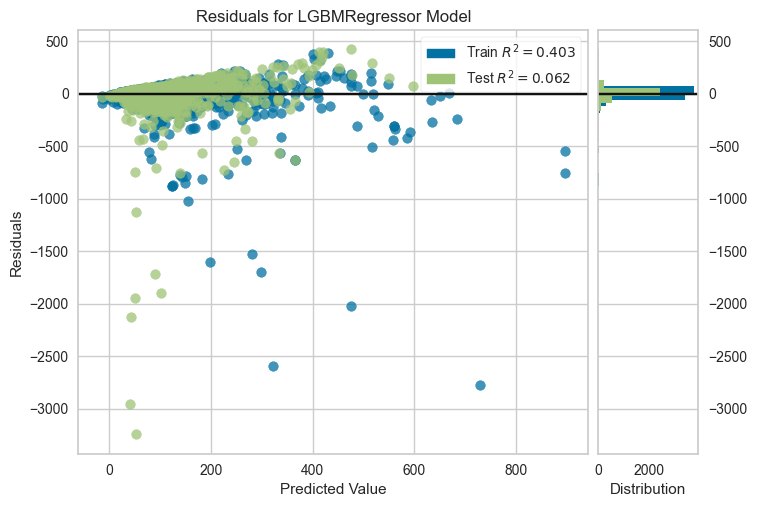

In [14]:
plot_model(best, plot="residuals")

In [15]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,38.6380,14667.8950,121.1111,0.0623,0.5218,0.4742


,neighbourhood,property_type,room_type,minimum_nights,accommodates,review_scores_cleanliness,review_scores_location,host_is_superhost,price,prediction_label
9727,Bonfim,Entire serviced apartment,Entire home/apt,1.0,8.0,4.42,4.92,f,143.0,174.965850
483,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Entire rental unit,Entire home/apt,3.0,4.0,5.00,4.71,f,110.0,79.952078
8405,Paranhos,Private room in villa,Private room,2.0,1.0,5.00,5.00,t,45.0,51.389327
10345,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Entire loft,Entire home/apt,2.0,2.0,5.00,5.00,f,110.0,77.781068
1844,Paranhos,Private room in home,Private room,1.0,2.0,4.60,4.47,f,30.0,27.931949
...,...,...,...,...,...,...,...,...,...,...
4901,Santa Marinha e São Pedro da Afurada,Entire rental unit,Entire home/apt,2.0,4.0,5.00,4.67,f,70.0,77.015963
9799,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Entire rental unit,Entire home/apt,1.0,4.0,4.89,4.74,t,87.0,113.503996
9873,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Entire loft,Entire home/apt,2.0,2.0,4.82,5.00,t,70.0,63.100293
10543,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Entire loft,Entire home/apt,1.0,4.0,4.80,5.00,f,115.0,77.667150


In [16]:
# Guardar el modelo best
save_model(best, "ML_model/best-model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['minimum_nights', 'accommodates',
                                              'review_scores_cleanliness',
                                              'review_scores_location'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['neighbourhood', 'property_type',
                                              'room_type', 'host_is_superhost'],
                                     transformer=SimpleImpute...
                  TransformerWrapper(include=['room_type'],
                                     transformer=OneHotEncoder(cols=['room_type'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('rest_encoding',
  

In [17]:
df.value_counts("host_is_superhost")

host_is_superhost
f    7390
t    3739
Name: count, dtype: int64

In [18]:
# Carga el modelo entrenado
modelo_entrenado = load_model("Ml_model/best-model")

# Datos de entrada para la predicción
datos_prediccion = pd.DataFrame(
    {
        "neighbourhood": ["Bonfim"],
        "property_type": ["Entire loft"],
        "room_type": ["Private room"],
        "minimum_nights": [4],
        "accommodates": [2],
        "review_scores_cleanliness": [5.0],
        "review_scores_location": [4.5],
        "host_is_superhost": ["t"],
        "price": [0],
    }
)

# Realiza la predicción
prediccion = predict_model(modelo_entrenado, data=datos_prediccion)

# Imprime la predicción
print(prediccion["price"])

Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,77.6558,6030.4158,77.6558,nan,4.3651,nan


0    0
Name: price, dtype: int8
